In [1]:
#импортируем библиотеки
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# (1) Используя параметры pandas прочитать красиво пандас 
df = pd.read_csv('UCI_Credit_Card.csv') #TODO
df.head(4)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0


In [3]:
# (2) выведите, что за типы переменных, сколько пропусков,
df.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

In [61]:
# для численных значений посчитайте пару статистик (в свободной форме)
# с помощью describe мы и считаем пару статистик одновременно, поэтому предложу её как первый вариант
df['LIMIT_BAL'].describe(percentiles=[0.9,0.99]).T

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
50%       140000.000000
90%       360000.000000
99%       500000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [65]:
# второй вариант конкретней:
print("Минимальное колонки 'LIMIT_BAL' = {}".format(df['LIMIT_BAL'].min()))
print("Среднее колонки 'LIMIT_BAL' = {0:.2f}".format(df['LIMIT_BAL'].mean()))
print("Медиана колонки 'LIMIT_BAL' = {}".format(df['LIMIT_BAL'].median()))

Минимальное колонки 'LIMIT_BAL' = 10000.0
Среднее колонки 'LIMIT_BAL' = 167484.32
Медиана колонки 'LIMIT_BAL' = 140000.0


In [71]:
# (3) посчитать число женщин с университетским образованием
# SEX (1 = male; 2 = female). 
# EDUCATION (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
smart_women = df[
    (df['SEX'] == 2) & (df['EDUCATION'] == 2)
].shape
print('Университетское образование имеет',smart_women[0], 'женщин')

Университетское образование имеет 8656 женщин


In [72]:
# либо через len
smart_women = len(df[
      (df['SEX'] == 2) & (df['EDUCATION'] ==2)
])
print('Университетское образование имеет',smart_women, 'женщин')

Университетское образование имеет 8656 женщин


In [76]:
# (4) Сгрупировать по "default payment next month" и посчитать медиану для всех показателей начинающихся на BILL_ и PAY_
line = []
for i in df.columns:
    if ('BILL_') in i:
        line.append(i)
    elif('PAY_') in i:
        line.append(i)
columns_to_show = line
# транспонировал ответ, так как таблица уходит за экран
df.groupby(['default.payment.next.month'])[columns_to_show].median().T

default.payment.next.month,0,1
PAY_0,0.0,1.0
PAY_2,0.0,0.0
PAY_3,0.0,0.0
PAY_4,0.0,0.0
PAY_5,0.0,0.0
PAY_6,0.0,0.0
BILL_AMT1,23119.5,20185.0
BILL_AMT2,21660.5,20300.5
BILL_AMT3,20202.5,19834.5
BILL_AMT4,19000.0,19119.5


In [84]:
# второй вариант с использованием startswith
dpnm='default.payment.next.month'
df[[s for s in df.columns if s.startswith('BILL_') | s.startswith('PAY_') | (s == grBy)]].groupby(dpnm).median().T

default.payment.next.month,0,1
PAY_0,0.0,1.0
PAY_2,0.0,0.0
PAY_3,0.0,0.0
PAY_4,0.0,0.0
PAY_5,0.0,0.0
PAY_6,0.0,0.0
BILL_AMT1,23119.5,20185.0
BILL_AMT2,21660.5,20300.5
BILL_AMT3,20202.5,19834.5
BILL_AMT4,19000.0,19119.5


In [117]:
# (5) постройте сводную таблицу (pivot table) по SEX, EDUCATION, MARRIAGE
cols=['ID','SEX','EDUCATION','MARRIAGE']
df[cols].pivot_table(df[cols],index=['SEX','MARRIAGE'],columns=['EDUCATION'],fill_value=0)

ID                                                          \
EDUCATION           0             1             2             3             4   
SEX MARRIAGE                                                                    
1   0             0.0  24444.000000  24722.000000  11619.916667      0.000000   
    1         27213.5  14549.651479  15296.578903  14847.441794  17826.722222   
    2         14308.0  14363.201671  14656.010204  15117.636465  17408.521739   
    3             0.0  11595.233333  15215.031746  13351.583333  23938.000000   
2   0             0.0  13005.000000  13161.800000  17418.250000      0.000000   
    1         21578.0  15033.563976  15272.627013  15914.895201  18767.176471   
    2         13962.0  14823.686063  14888.093137  15262.420690  17766.622222   
    3             0.0  14976.950000  13705.131313  12542.238806  24423.500000   

                                          
EDUCATION                5             6  
SEX MARRIAGE                              
1   0             0.000000      0.000000  
    1         20020.500000  19884.500000  
    2         18037.065217  17602.545455  
    3         27406.000000      0.000000  
2   0             0.000000      0.000000  
    1         16835.029412  16326.214286  
    2         16274.679012  13957.400000  
    3         15354.500000  10747.000000

In [9]:
# (6) Создать новый строковый столбец в data frame-е, который:
# принимает значение A, если значение LIMIT_BAL <=10000
# принимает значение B, если значение LIMIT_BAL <=100000 и >10000
# принимает значение C, если значение LIMIT_BAL <=200000 и >100000
# принимает значение D, если значение LIMIT_BAL <=400000 и >200000
# принимает значение E, если значение LIMIT_BAL <=700000 и >400000
# принимает значение F, если значение LIMIT_BAL >700000
#TODO

In [10]:
# сначала нужно написать функцию, которая выполняет нужный перевод
def A_F_sort(row):
    if (row <= 10000):
        return 'A'
    elif (row <= 100000 and row > 10000):
        return 'B'
    elif (row <= 200000 and row > 100000):
        return 'C'
    elif (row <= 400000 and row > 200000):
        return 'D'
    elif (row <= 700000 and row > 400000):
        return 'E'
    elif (row > 700000):
        return 'F'
#      параметр, входящий в функцию, считается объектом серии, помеченным как "строка".

In [118]:
# используем функцию для решения 6 задачи
# df['L_B'] = df['LIMIT_BAL'].map(lambda x: A_F_sort(x))
# без lambda
df['L_B'] = df['LIMIT_BAL'].map(A_F_sort)
# выводим результат
df['L_B'].head(5)

0    B
1    C
2    B
3    B
4    B
Name: L_B, dtype: object

In [120]:
# тренировка с iloc по 6 заданию
# При работе с целочисленными индексами, индекс можно ставить сразу после имени переменной в квадратных скобках 
# (пример: s[1]), или можно воспользоваться .iloc (пример: s.iloc[1]).
# number=0
df['L_B3'] = df['LIMIT_BAL']
count = df['L_B'].shape[0]
# либо с len вместо shape[0]
for number in range(count):
    print(A_F_sort(df['L_B3'].iloc[number]))

B
C
B
B
B
B
E
B
C
B
C
D
E
B
D
B
B
D
D
C
C
C
B
E
B
B
B
B
B
B
D
B
B
E
E
C
D
B
B
D
D
B
A
C
B
D
B
C
D
B
B
B
D
C
C
E
C
C
C
D
E
B
B
B
C
C
A
D
C
B
B
D
C
D
D
B
B
D
B
D
E
D
B
D
B
C
D
C
C
B
C
D
B
C
B
B
D
C
B
B
C
D
E
B
B
B
B
D
C
D
D
B
D
B
B
B
D
B
D
D
B
E
C
D
B
B
C
C
B
B
B
D
E
D
B
D
C
D
B
B
D
C
B
C
B
B
C
C
B
D
C
B
D
D
B
C
C
C
D
B
B
B
D
D
B
C
D
B
B
B
D
D
B
B
D
C
B
B
B
B
D
B
E
B
B
B
D
C
C
B
D
B
C
C
B
B
C
B
E
B
C
C
C
C
D
B
B
D
B
D
D
D
B
B
E
B
D
B
C
D
D
D
D
D
B
C
D
B
B
B
B
B
B
C
B
B
C
D
D
C
B
B
B
C
B
B
D
B
D
B
B
B
C
C
D
B
C
C
B
D
E
B
C
D
B
C
A
C
B
B
B
C
D
C
D
B
E
B
B
D
B
D
C
B
D
D
D
E
B
D
D
B
B
A
C
C
C
D
D
D
B
E
B
B
C
C
E
D
B
B
D
C
B
C
B
B
C
D
B
C
C
D
B
D
D
D
D
B
D
C
C
C
B
D
B
C
D
C
B
C
D
B
C
C
C
C
B
B
C
B
B
C
D
B
B
C
D
D
C
D
E
D
B
C
D
D
B
A
D
B
C
C
B
B
C
B
B
C
D
B
C
B
C
C
B
E
B
B
C
D
D
D
D
C
D
C
B
B
D
C
D
B
C
B
C
C
C
E
D
D
B
C
D
D
E
B
C
B
B
D
B
E
D
C
E
B
B
C
B
D
B
D
C
E
D
D
B
C
B
B
B
B
B
C
D
D
C
C
C
C
D
E
D
C
B
B
C
B
D
B
C
B
D
D
C
D
D
D
E
B
D
D
C
B
C
B
B
B
E
C
D
C
B
B
B
C
D
D
D
D
B
B
D
C
B
B
C
B
D
B


C
D
B
C
D
D
A
B
B
B
B
C
B
B
C
B
B
C
E
B
B
B
B
E
C
B
B
D
B
C
D
C
C
D
C
E
D
C
E
B
D
B
C
C
B
D
B
B
D
D
C
C
B
C
D
C
E
B
C
D
B
B
D
B
C
B
B
C
D
B
B
B
B
E
D
B
C
C
B
B
B
B
D
D
B
B
D
E
E
D
C
B
D
B
D
B
E
C
C
C
D
B
B
B
B
B
D
E
B
C
D
E
C
D
C
B
D
B
E
D
E
D
B
C
C
B
B
B
D
B
B
B
B
D
B
D
D
B
B
B
D
C
B
C
B
B
D
D
B
B
D
E
B
B
C
B
B
B
D
B
D
C
E
D
B
B
C
B
B
B
C
D
B
B
D
D
D
C
B
B
B
B
A
C
D
C
C
C
C
D
B
B
E
B
C
D
B
D
C
B
B
B
C
B
C
B
C
C
B
B
B
C
E
D
B
B
D
C
C
C
E
C
D
D
B
B
D
D
B
C
B
B
B
D
B
B
C
B
C
D
B
C
B
D
E
B
C
B
D
D
B
D
D
D
B
C
E
B
D
D
B
B
B
B
C
C
C
B
B
D
C
D
D
B
C
D
B
D
B
D
D
C
C
B
B
B
C
B
B
B
C
B
D
B
B
D
B
C
B
C
E
B
B
C
B
D
D
D
C
D
B
C
D
D
B
C
C
D
A
B
B
B
C
C
D
B
C
C
B
D
D
B
B
B
D
D
C
D
C
D
B
C
B
B
E
B
C
E
B
C
C
D
C
C
E
C
B
E
B
D
B
C
B
B
D
B
C
D
D
D
C
B
B
D
E
D
C
C
B
B
C
B
D
E
C
B
D
B
D
D
C
B
D
C
D
B
B
D
D
D
D
B
B
B
B
B
D
C
B
C
B
C
C
B
B
B
C
B
C
D
B
C
C
C
C
C
B
D
B
B
D
B
C
B
D
B
B
C
B
B
B
D
B
B
D
E
D
D
B
B
D
C
B
D
C
C
D
B
B
B
C
B
D
B
C
C
B
C
B
B
E
D
E
C
C
B
C
C
D
B
D
B
D
D
D
C
B
B
C
B
C
C
D
C
B
B
D
B
D
D


C
B
B
D
B
E
D
C
A
B
C
B
D
D
C
D
B
C
C
B
C
C
B
B
E
B
C
B
B
C
D
C
B
D
B
E
B
C
B
B
D
B
C
B
B
D
E
C
C
D
D
B
D
D
D
B
D
B
B
B
D
C
B
B
B
D
B
C
B
C
C
D
B
C
C
D
B
A
D
C
B
D
B
B
D
B
E
D
C
C
D
B
D
B
C
D
D
B
B
C
D
B
B
D
C
C
C
B
C
C
D
B
C
B
B
C
C
D
D
C
B
D
E
B
B
B
B
B
C
D
D
C
B
B
C
B
B
D
C
C
A
D
B
B
B
D
C
C
A
D
B
B
C
B
B
B
B
B
B
B
C
B
B
C
B
B
D
B
C
E
B
C
D
E
B
C
C
B
D
C
B
B
C
B
C
D
D
C
D
B
B
C
B
D
C
C
B
B
B
B
D
E
C
B
B
D
B
B
D
D
B
B
B
D
B
C
C
B
D
D
B
C
E
B
B
B
D
C
C
B
D
B
D
C
B
B
B
D
B
D
B
B
E
D
C
C
E
D
C
B
B
D
B
B
C
E
C
E
D
B
B
D
B
D
D
C
D
D
B
B
B
B
B
C
D
B
B
A
C
B
B
C
E
C
C
B
B
D
A
D
D
D
B
D
C
B
D
D
B
C
C
C
D
D
B
C
B
C
D
B
C
B
E
B
B
B
C
A
B
B
C
B
B
B
C
D
B
B
D
C
B
C
C
C
D
D
B
C
B
D
D
C
B
C
B
D
C
B
C
B
D
D
C
C
D
B
D
C
B
B
D
C
D
D
B
C
C
D
B
D
B
D
B
C
B
C
B
D
C
C
C
B
D
D
C
B
C
B
B
B
B
C
B
B
B
B
B
B
D
E
D
C
B
D
D
B
B
B
C
B
C
C
C
B
D
D
B
D
B
C
C
D
E
B
D
B
B
B
C
C
B
B
D
C
C
D
C
D
B
B
C
D
B
B
C
C
B
C
B
C
B
D
C
B
C
E
B
D
D
D
C
E
C
B
B
B
C
B
D
B
D
C
D
D
B
D
B
C
B
E
D
C
D
B
B
C
C
B
D
B
D
C
B
C
C
D
B
B
D
C


B
B
B
B
D
B
D
C
E
D
B
D
D
C
D
C
B
C
B
B
C
D
B
C
B
B
B
E
B
C
C
C
B
A
B
B
D
B
B
C
C
C
B
B
B
B
B
C
D
E
E
B
E
D
E
D
A
D
B
D
E
C
D
B
D
B
B
C
D
B
B
B
D
B
B
B
B
D
D
D
D
D
C
D
B
C
D
E
A
B
B
D
C
B
B
D
A
D
D
D
B
E
B
B
B
C
B
B
D
B
B
C
E
B
C
B
B
C
D
E
E
B
C
D
D
B
B
B
D
D
C
D
B
C
E
D
B
C
D
B
E
B
C
E
C
B
C
D
D
C
C
D
B
D
C
D
D
B
D
B
B
D
B
E
B
B
B
C
C
B
D
D
D
D
C
B
C
B
C
B
E
D
D
B
B
B
C
E
B
D
B
C
C
D
B
B
C
B
D
D
B
B
D
D
B
B
D
D
E
B
D
E
C
C
B
D
C
B
B
B
B
D
A
D
D
C
B
C
B
D
B
E
B
D
D
B
D
D
E
D
B
D
B
C
C
B
A
D
B
B
B
B
B
D
B
C
E
B
B
B
D
D
C
B
B
D
C
C
D
A
D
C
B
C
B
E
E
B
E
B
B
C
D
C
D
B
C
D
D
B
B
D
B
E
B
B
C
B
C
B
B
B
C
C
C
C
C
D
B
E
D
B
D
B
D
B
C
B
A
C
D
B
B
E
D
E
A
D
B
B
B
D
B
C
B
C
D
C
B
D
C
D
B
B
C
B
C
D
C
B
B
D
C
B
B
C
B
B
C
D
C
C
C
C
B
E
C
C
C
C
B
C
C
B
D
B
E
D
C
D
B
B
D
B
C
B
B
C
C
D
B
C
C
C
C
B
B
C
D
C
D
D
B
B
B
B
C
B
C
B
C
B
B
B
B
C
D
A
C
C
D
B
B
C
B
C
A
D
D
C
D
B
C
E
C
B
C
A
B
B
B
D
A
D
B
B
D
B
C
A
B
C
D
B
D
D
B
B
B
B
B
C
D
D
B
D
D
A
B
D
B
C
B
C
D
D
B
B
D
B
C
B
D
D
D
C
B
C
B
B
E
C
B
E
B
E
C
D
D
B


D
B
C
B
B
D
B
B
C
C
B
B
B
B
B
C
B
A
C
B
B
D
C
C
E
D
B
C
C
D
B
B
C
B
B
C
D
B
C
E
C
C
B
C
B
B
B
D
D
B
D
B
D
D
D
D
C
D
D
C
B
B
D
C
C
B
D
B
C
B
D
D
D
B
B
D
D
E
D
D
C
C
C
C
D
B
C
B
B
C
C
B
B
C
C
C
C
B
C
C
B
B
D
D
E
C
B
B
C
C
D
B
B
E
D
C
B
B
D
B
B
B
B
C
D
D
D
D
B
C
C
B
B
C
D
D
B
D
D
D
D
C
B
C
B
D
B
B
B
B
C
C
D
D
C
B
D
B
C
B
B
C
B
B
D
D
D
E
D
B
D
D
C
E
B
D
D
B
D
C
B
C
C
C
D
B
B
B
D
C
C
D
C
B
B
C
D
C
D
B
B
C
C
D
B
E
C
C
B
E
C
D
D
D
D
D
C
E
B
C
D
D
C
D
B
D
D
D
C
C
C
C
D
B
C
B
B
C
B
C
C
D
D
B
C
B
D
B
B
B
C
D
D
B
C
C
B
B
C
D
B
D
B
D
B
B
B
C
D
B
B
E
D
B
C
C
B
D
C
C
B
C
C
C
B
C
D
B
E
D
D
C
E
B
C
D
D
B
C
B
D
C
B
D
B
B
D
C
E
D
B
C
C
D
C
D
B
D
D
B
D
C
D
D
D
C
D
D
B
C
C
D
D
D
B
B
E
D
C
C
B
C
C
D
C
C
C
D
B
C
B
B
C
C
B
D
C
B
D
D
B
B
C
B
B
B
E
C
D
C
D
B
D
C
D
C
B
D
B
D
B
B
D
D
D
E
B
C
B
B
D
C
D
C
D
B
B
B
C
C
B
D
C
C
C
C
C
B
D
C
C
D
C
C
C
D
C
C
B
D
E
D
B
D
C
D
B
D
D
C
D
C
E
E
B
B
B
B
B
C
D
D
D
B
C
D
B
D
D
B
B
D
B
B
C
C
D
C
C
B
B
C
B
D
B
D
E
B
B
C
D
D
B
E
C
C
C
C
D
D
B
B
D
D
D
B
B
B
B
B
C
D
D
B
D
D
C
D
B
D


D
D
C
D
D
B
C
C
E
B
D
B
C
D
D
C
D
E
D
E
D
B
D
E
E
B
E
B
E
C
B
D
D
D
B
D
B
B
D
D
D
C
B
B
B
B
D
B
B
B
B
D
E
D
C
E
B
C
B
C
B
B
B
E
B
D
D
D
C
C
B
D
D
C
B
C
E
D
C
C
B
D
D
B
C
D
C
C
C
B
D
C
D
C
C
C
C
D
D
C
B
C
D
C
B
B
D
E
D
E
C
B
E
C
B
C
B
D
C
D
C
E
C
D
B
D
C
D
B
C
C
E
D
D
C
E
C
D
D
D
B
C
C
C
D
D
D
C
E
E
D
D
D
C
D
D
D
D
D
E
D
D
D
D
D
D
C
D
C
A
E
B
D
C
C
D
D
B
C
C
D
D
B
C
D
D
D
C
B
B
D
D
C
C
B
E
B
B
C
B
D
D
B
E
B
D
D
D
C
C
D
D
C
E
D
E
C
D
C
D
C
D
C
D
D
E
D
C
B
B
D
B
C
C
D
C
D
C
C
C
D
B
C
B
B
D
C
D
E
B
D
C
E
C
D
E
B
C
D
D
D
B
D
C
B
D
B
D
B
E
B
B
B
B
C
B
C
A
B
E
B
D
D
B
E
E
D
D
B
B
D
B
D
B
D
B
B
E
B
D
D
B
B
B
D
D
C
D
B
B
B
D
B
C
D
D
B
B
B
B
C
B
C
B
D
C
B
B
D
C
B
E
C
D
B
D
D
E
C
D
C
D
B
B
C
C
C
B
C
D
B
B
D
D
B
B
B
B
C
C
B
C
B
D
C
B
B
B
B
C
B
B
B
D
C
D
D
E
E
D
C
B
C
B
C
E
D
B
E
D
B
C
B
C
D
B
E
D
D
C
B
C
D
B
B
C
D
D
D
D
E
C
B
D
C
D
D
B
D
E
D
D
C
C
C
D
D
D
B
D
D
C
D
B
C
B
B
B
C
D
D
D
B
B
B
C
D
C
C
D
D
D
B
B
B
C
C
B
D
D
D
C
B
D
D
D
B
B
B
B
B
C
E
D
C
C
B
B
B
B
C
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B
B


C
D
D
C
E
B
B
D
D
C
C
B
D
B
C
B
E
D
C
B
D
B
D
D
C
C
D
E
D
D
E
D
C
D
C
C
D
E
B
C
D
C
D
B
E
C
D
C
E
D
B
D
C
B
B
C
D
C
B
C
C
B
C
D
B
C
C
D
D
C
D
D
C
B
E
D
B
D
E
D
C
B
B
D
E
C
C
C
B
C
C
D
E
B
D
D
C
B
C
C
C
D
C
B
D
D
B
C
D
C
B
D
B
B
B
D
B
D
C
D
C
D
E
A
B
C
D
B
C
D
E
C
B
A
B
B
B
B
D
D
B
D
C
E
D
D
B
B
C
D
D
D
D
C
D
B
D
B
C
B
D
C
C
D
C
D
D
B
C
B
D
C
B
C
D
B
C
D
B
C
B
D
B
C
B
E
B
C
B
B
C
B
D
B
B
D
B
B
C
C
C
D
D
D
B
B
D
B
B
D
B
E
D
D
D
C
C
E
D
B
C
C
E
B
C
B
D
B
D
D
B
D
B
C
B
C
B
B
D
B
C
B
A
B
D
C
B
B
B
B
B
B
E
D
D
D
C
D
C
B
E
C
C
D
B
C
B
B
C
D
B
B
C
B
B
C
A
B
A
C
A
B
B
A
B
B
B
B
C
A
B
B
B
B
B
B
B
A
C
B
B
A
B
A
A
B
B
B
B
A
B
B
D
B
B
A
B
B
B
B
B
C
B
B
B
C
B
A
B
B
B
B
B
B
B
B
B
B
B
B
B
B
A
A
B
B
C
D
B
B
C
B
C
C
B
C
B
B
D
C
C
D
A
B
C
B
D
C
B
C
B
B
C
B
B
B
C
B
B
B
D
C
B
D
B
D
B
B
D
C
C
B
A
C
B
B
D
B
B
B
D
C
C
B
C
B
B
B
B
B
B
B
B
D
B
B
D
A
D
B
C
B
B
B
C
B
B
D
B
A
B
C
B
B
D
B
C
B
B
B
B
C
D
B
D
B
B
B
B
C
D
C
B
C
D
D
C
D
C
D
A
C
B
C
C
C
D
C
D
B
B
C
C
E
A
E
C
D
B
B
D
C
B
D
C
E
C
B
B
B
B
D
B
C
B
C
B
A
B
A


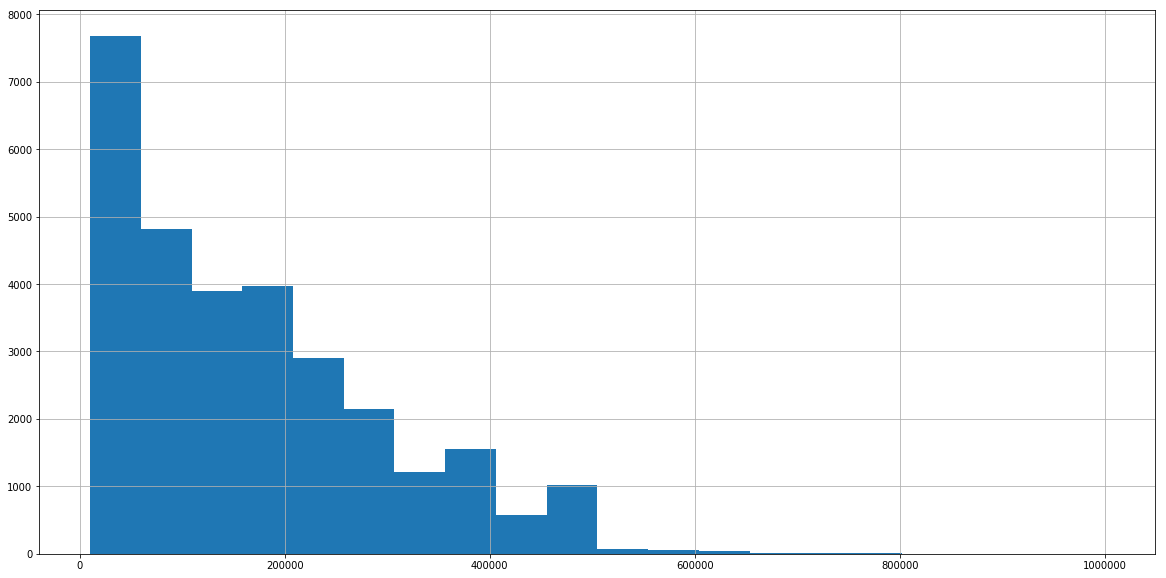

In [122]:
# (7) постироить распределение LIMIT_BAL (гистрограмму)
# библиотеки задали ещё в шапке:
# %matplotlib inline
# from matplotlib import pyplot as plt
df['LIMIT_BAL'].hist(bins=20) #TODO

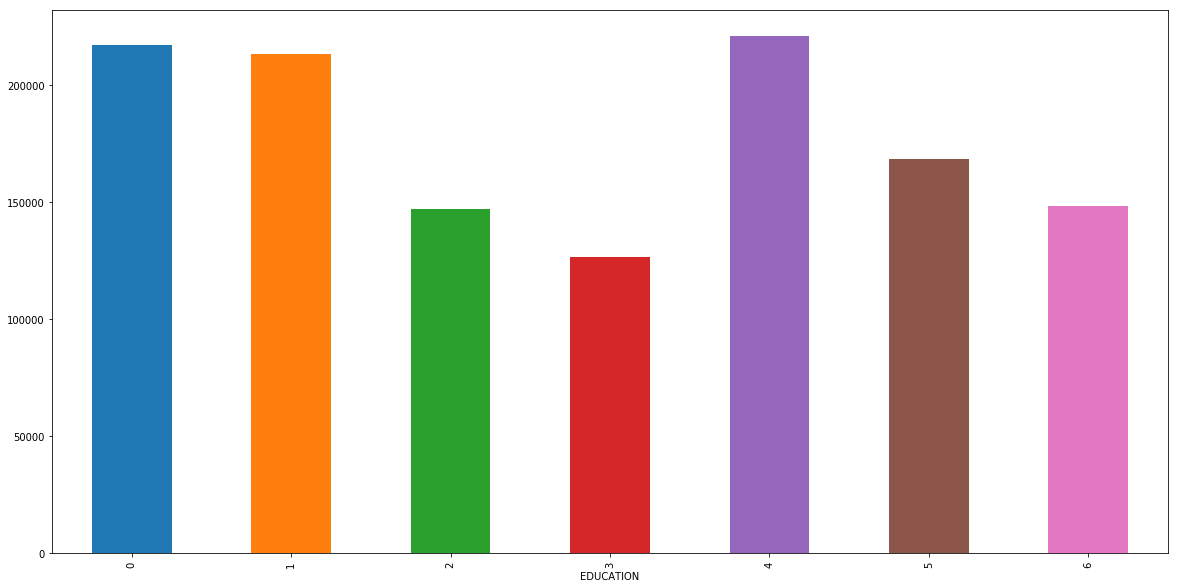

In [26]:
# (8) построить среднее значение кредитного лимита для каждого вида образования 
x = df.groupby(['EDUCATION']).LIMIT_BAL.mean()
# и для каждого пола
# график необходимо сделать очень широким (на весь экран)
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
x.plot(kind='bar')
# столбец 'SEX' убрал, так как в задании нет уточнения о том, какой пол должен быть у человека

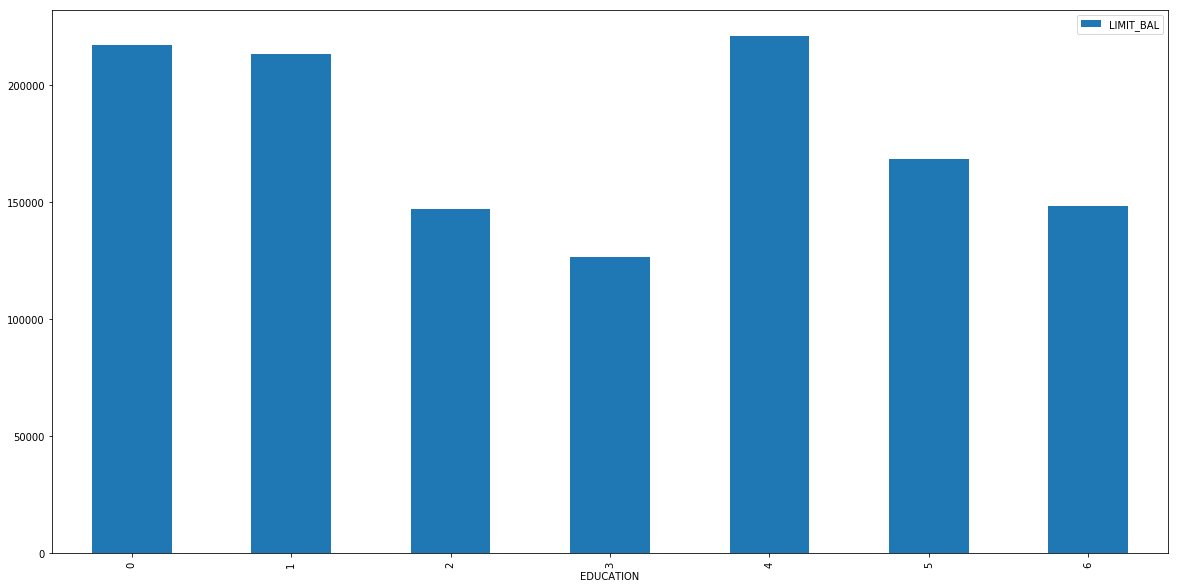

In [27]:
#другой вариант решения
_, ax = plt.subplots(figsize=(20,10))
df.pivot_table('LIMIT_BAL', 'EDUCATION').plot(kind='bar', ax=ax)

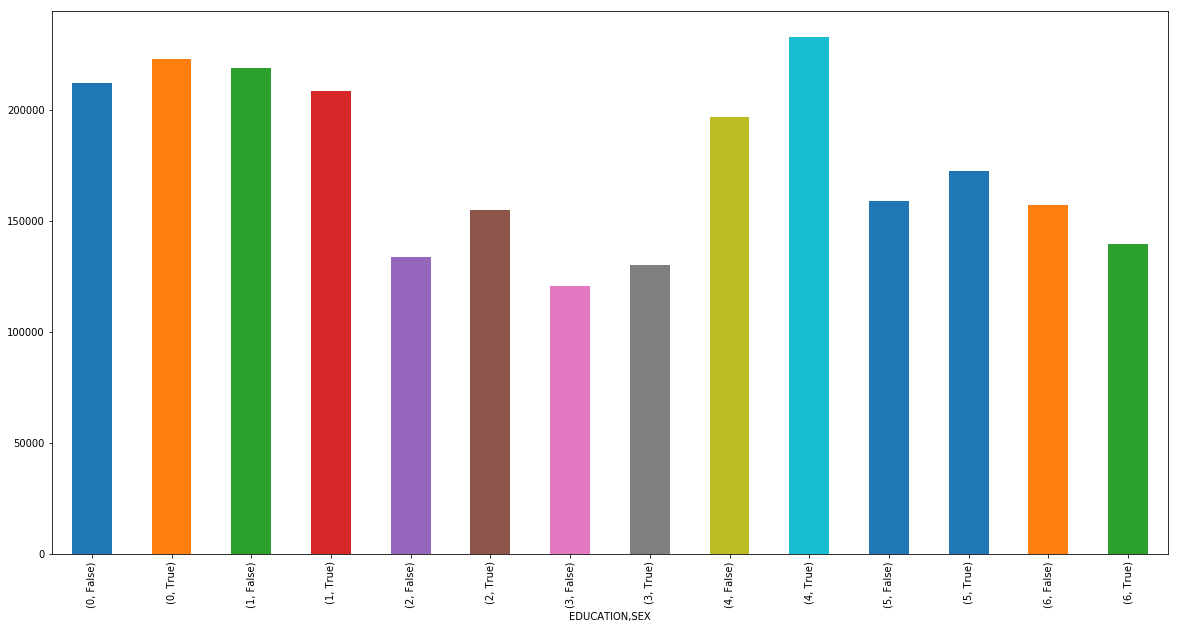

In [125]:
# (9) построить зависимость кредитного лимита и образования только для одного из полов
# _, ax = plt.subplots(figsize=(20,10))
x = df.groupby(['EDUCATION', df['SEX']==2]).LIMIT_BAL.mean()
x.plot(kind='bar')
# df.pivot_table('LIMIT_BAL', 'EDUCATION').plot(kind='bar', ax=ax)
# df.pivot_table('LIMIT_BAL', 'EDUCATION', 'SEX', 'count').plot(kind='bar', ax=ax)

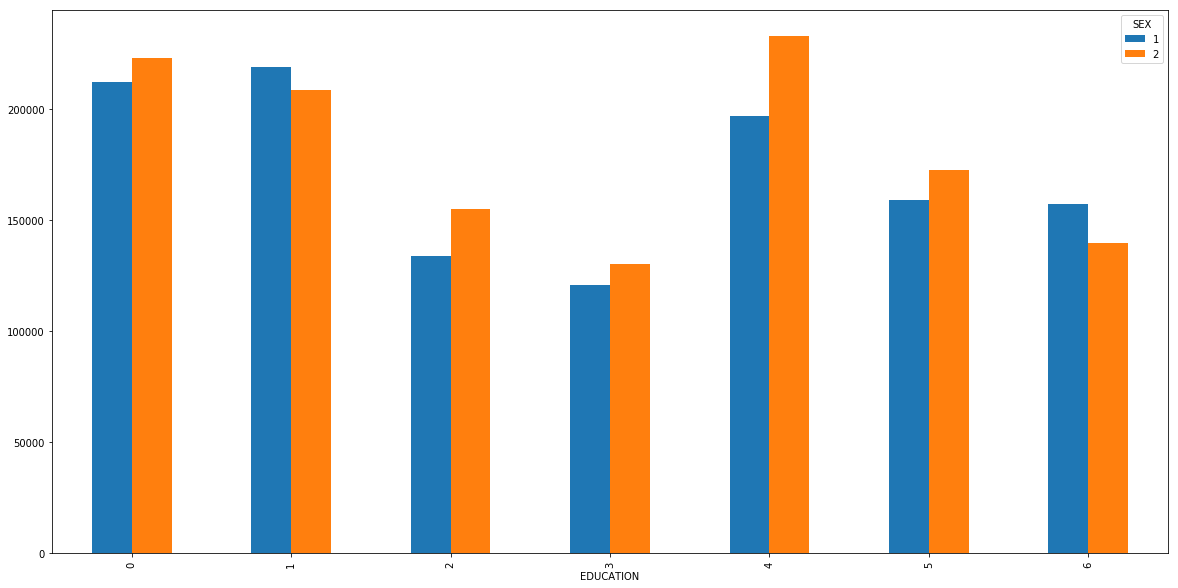

In [127]:
_, ax = plt.subplots(figsize=(20,10))
df.pivot_table('LIMIT_BAL', 'EDUCATION', 'SEX').plot(kind='bar', ax=ax)

In [ ]:
# (10) построить большой график (подсказка - используя seaborn) для построения завимисости всех возможных пар параметров
# разным цветом выделить разные значение "default payment next month"
# (но так как столбцов много - картинка может получиться "монструозной")
# (поэкспериментируйте над тем как построить подобное сравнение параметров)
# (подсказка - ответ может состоять из несколькольких графиков)
# (если не выйдет - программа минимум - построить один график со всеми параметрами)
import seaborn as sns
sns.pairplot(df, hue='default.payment.next.month')

#TODO